Enter event number: 11111


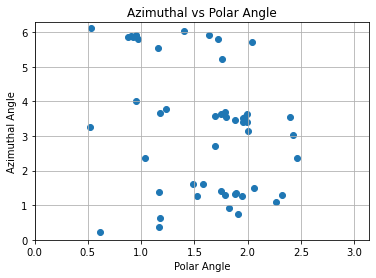

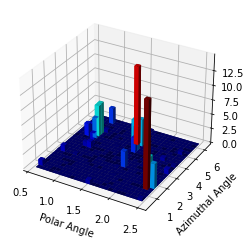

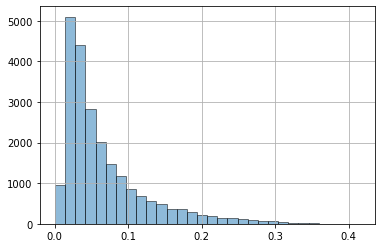

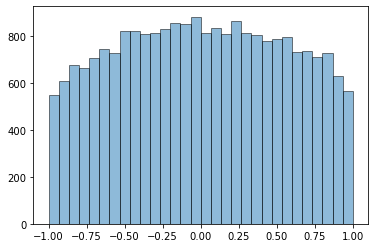

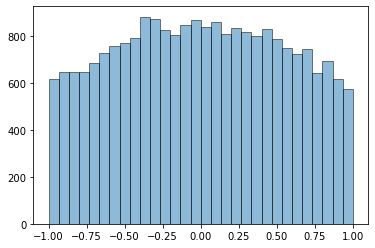

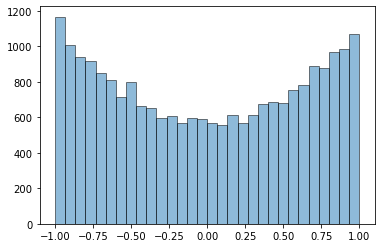

In [2]:
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


events = pd.read_excel("/Users/ravial-sahalman/Downloads/CollisionEventsFinal.xlsx")
events1 = events.fillna(0)
n = int(input('Enter event number:'))
column1 = []  # placeholder for appending values of a desired event for p_x value
column2 = []  # p_y placeholder
column3 = []
column4 = []
count = 0
for row in events1.itertuples(): 
     if row[1] == 0.0 and row[2] ==0.0 and row[3] ==0.0 and row[4]==0.0 and row[5] == 0.0: # if row is empty count will increase by 1
            count += 1
     else:
          if count == n:   # If desired count is reached  all columns will append values until empty line is reached and count will increase 
                column1.append(row[1])
                column2.append(row[2])
                column3.append(row[3])
                column4.append(row[4])
                
                
P_x = column1[2:]    # Creates arrays with strictly just momentum, energy and ids
P_y = column2[2:]
P_z = column3[2:]
E = column4[2:]

#print(E)

#print(column1) #######
##print(P_x)
##print(P_y)

datalength = len(column1)

# Creates my polar angle
x = []
for a in range(len(P_x)):  
     #print(P_x[a])
     #print(P_y[a]) 
     #print(P_z[a])
    if P_z[a] <0.0:
        theta = np.arctan((np.sqrt(P_x[a]**2 + P_y[a]**2))/P_z[a]) + np.pi
        x.append(theta)  # This will be my axis for theta
    else:
        theta = np.arctan((np.sqrt(P_x[a]**2 + P_y[a]**2))/P_z[a])
        x.append(theta)
    
#print(x) ###

#Creates my azimuthal angle
y = []
for i in range(len(P_x)):
    if P_y[i] < 0 and P_x[i] > 0 :
        phi = np.arctan(P_y[i]/P_x[i]) + 2*np.pi
        y.append(phi)
    elif P_x[i] < 0:
        phi = np.arctan(P_y[i]/P_x[i]) + np.pi
        y.append(phi)
    else:
        phi = np.arctan(P_y[i]/P_x[i])
        y.append(phi)

  

    


plt.scatter(x,y)
plt.grid()
plt.xlim(0,np.pi)
plt.ylim(0,2*np.pi)
plt.xlabel('Polar Angle')
plt.ylabel('Azimuthal Angle')
plt.title('Azimuthal vs Polar Angle')
plt.show()



x = np.array(x)   #turn x,y data into numpy arrays
y = np.array(y)

fig = plt.figure()          
ax = fig.add_subplot(111, projection='3d')

#sets bins for histogram data
hist, xedges, yedges = np.histogram2d(x, y, bins=(25,25), weights = E)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])


xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get colormap
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
#scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

    

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.xlabel('Polar Angle')
plt.ylabel('Azimuthal Angle')
plt.show()

# Jet observables
first = []  # Tau
second = [] # Px
third = []  #Py
fourth = [] #Pz
for row in events1.itertuples(): 
     if row[1] != 0.0 and row[2] !=0.0 and row[3] != 0.0 and row[4 ]!=0.0 and row[5] == 0.0:
            first.append(row[1])
            second.append(row[2])
            third.append(row[3])
            fourth.append(row[4])
            

# Probability distributions for my jet observables           
plt.hist(first,bins = 30,alpha = 0.5,histtype = 'bar', ec = 'black')
plt.grid()
plt.show()

plt.hist(second,bins = 30,alpha = 0.5,histtype = 'bar', ec = 'black')
plt.show()

plt.hist(third, bins = 30,alpha = 0.5,histtype = 'bar', ec = 'black')
plt.show()

plt.hist(fourth,bins = 30,alpha = 0.5,histtype = 'bar', ec = 'black')
plt.show()
